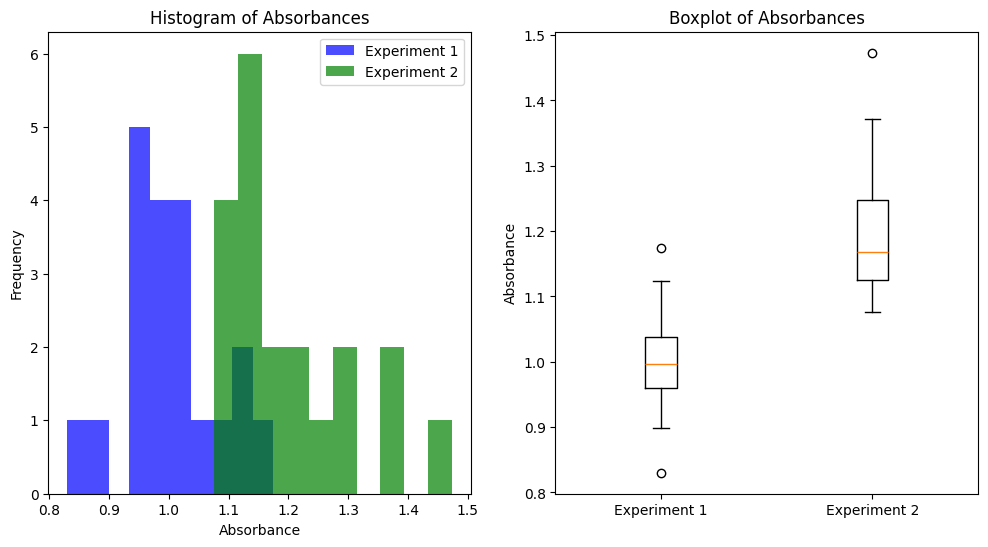

(ShapiroResult(statistic=0.9773110829726963, pvalue=0.894866441725503),
 ShapiroResult(statistic=0.8913889210483075, pvalue=0.028522808269457144),
 LeveneResult(statistic=1.098390634173958, pvalue=0.30124000537855744))

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data for both experiments
experiment_1 = np.array([0.830205, 1.006309, 1.096814, 1.024998, 1.035848, 0.937119, 0.994132, 1.043624, 1.026755,
                         0.898032, 1.112773, 0.939971, 0.967169, 0.958998, 0.959607, 0.998062, 0.989123, 1.174754,
                         0.976223, 1.123032])
experiment_2 = np.array([1.23826, 1.371683, 1.47305, 1.288239, 1.07587, 1.12611, 1.130412, 1.371734, 1.275533,
                         1.108623, 1.147516, 1.122809, 1.191291, 1.184368, 1.234568, 1.108874, 1.151556, 1.151609,
                         1.22197, 1.100457])

# Visualizing the data distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(experiment_1, bins=10, color='blue', alpha=0.7, label='Experiment 1')
plt.hist(experiment_2, bins=10, color='green', alpha=0.7, label='Experiment 2')
plt.title('Histogram of Absorbances')
plt.xlabel('Absorbance')
plt.ylabel('Frequency')
plt.legend()

# Boxplot to compare the two experiments
plt.subplot(1, 2, 2)
plt.boxplot([experiment_1, experiment_2], labels=['Experiment 1', 'Experiment 2'])
plt.title('Boxplot of Absorbances')
plt.ylabel('Absorbance')
plt.show()

# Shapiro-Wilk test for normality
normality_test_1 = stats.shapiro(experiment_1)
normality_test_2 = stats.shapiro(experiment_2)

# Levene's test for equal variances
variance_test = stats.levene(experiment_1, experiment_2)

(normality_test_1, normality_test_2, variance_test)


First, we'll check the assumptions of the t-test, which include:

Normality: The data should be approximately normally distributed.
Homogeneity of variances: The variances of the two groups should be similar.
If the data violates these assumptions, we may consider using a non-parametric alternative like the Mann-Whitney U test.

Let's first visualize the data distributions and then perform the t-test using Python. Here's how you can do it:

Visualizing the data to assess normality and see how the groups compare.
Performing a Shapiro-Wilk test for normality.
Checking variances with Levene's test.
Conducting a t-test if assumptions are met, or a Mann-Whitney U test if they are not.

Linear Regression

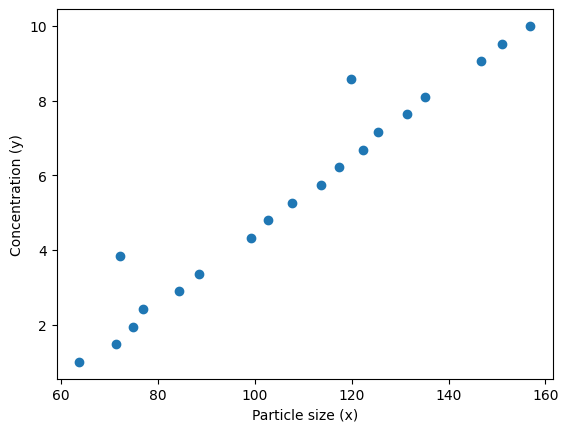

In [1]:
import numpy as np
import matplotlib.pyplot as plt

particle_size = np.array([63.82226,71.4442,74.78978,77.03388,84.4384,88.55918,72.14541,99.15352,102.6502,107.7106, 113.628, 117.4076, 122.3761, 125.4994, 131.3897, 135.1808,
                          119.9073, 146.7856, 151.0319, 156.8916])

concentration = np.array ([1, 1.473684, 1.947368, 2.42105, 2.894737, 3.368421, 3.842105, 4.315789, 4.789474, 5.263158,
                           5.736842, 6.210526, 6.684211, 7.157895, 7.631579, 8.105263, 8.578947, 9.052632, 9.526316, 10])


plt.scatter(particle_size, concentration)
plt.xlabel('Particle size (x)')
plt.ylabel('Concentration (y)')
plt.show()

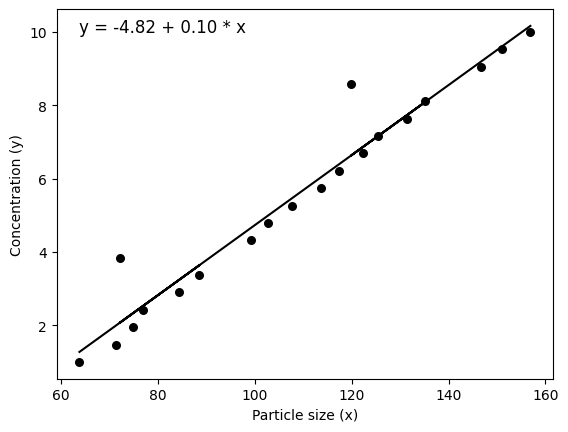

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
particle_size = np.array([63.82226, 71.4442, 74.78978, 77.03388, 84.4384, 88.55918, 72.14541, 99.15352, 102.6502, 107.7106,
                          113.628, 117.4076, 122.3761, 125.4994, 131.3897, 135.1808, 119.9073, 146.7856, 151.0319, 156.8916])
concentration = np.array([1, 1.473684, 1.947368, 2.42105, 2.894737, 3.368421, 3.842105, 4.315789, 4.789474, 5.263158,
                          5.736842, 6.210526, 6.684211, 7.157895, 7.631579, 8.105263, 8.578947, 9.052632, 9.526316, 10])

# Function to estimate coefficients
def coeff_estimation(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)

# Function to plot regression line
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="black", marker="o", s=30)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    # plotting the regression line
    plt.plot(x, y_pred, color="black")

    # putting labels
    plt.xlabel('Particle size (x)')
    plt.ylabel('Concentration (y)')

    equation_text = f'y = {b[0]:.2f} + {b[1]:.2f} * x'
    plt.text(np.min(particle_size), np.max(concentration), equation_text, fontsize=12, color='black')

    # showing plot
    plt.show()

# Estimate the coefficients
b = coeff_estimation(particle_size, concentration)

# Plot regression line
plot_regression_line(particle_size, concentration, b)
